In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations

from wordcloud import WordCloud
from kiwipiepy import Kiwi
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("HLeadership_preprocessing.csv", encoding = "cp949")
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47
0,1,1,1,1,4,4,4,4,4,4,...,5,5,5,5,4,5,4,1,dassssssssssssssssssssssssssssssssssssssssssss...,xzcvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv...
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,1,테스트입력입니다.테스트입력입니다.테스트입력입니다.테스트입력입니다.테스트입력입니다.테...,테스트입력입니다.테스트입력입니다.테스트입력입니다.테스트입력입니다.테스트입력입니다.테...
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,1,팔로워의 역량을 이끌어내기 위해 각자의 강잠을 파악하여 업무 R&R을 분배하며 문제...,"특별히 개선할 점은 없음, 현재 회사의 업무 R&R의 한계로 부서별 업무 충돌발생시..."
3,5,5,5,5,5,5,5,5,5,5,...,2,2,2,3,3,3,3,1,문제 해결능력과 끈기로 업무 성취력이 뛰어납니다. 책임감 있습니다. 맡은 업무 및 ...,소통의 필요성이 보입니다. 업무의 공유가 잘 되지않는것같습니다. .............
4,5,4,5,4,5,5,5,5,4,5,...,5,5,5,5,5,5,5,6,다방면 전문능력 바탕 업무효율성 제고 및 시너지 효과 창출 극대화 [경영진단(全부서...,다방면의 전문경험과 H에서의 현장/본사/계열사 경영진단(감사) 경험을 토대로 현 업...


In [3]:
cluster = pd.read_csv("Hcluster.csv", encoding = "CP949")
cluster.head()

,Unnamed: 0,Q45.sol,Q46,Q47,cluster
0,3,열정조직통합형,팔로워의 역량을 이끌어내기 위해 각자의 강잠을 파악하여 업무 R&R을 분배하며 문제...,"특별히 개선할 점은 없음, 현재 회사의 업무 R&R의 한계로 부서별 업무 충돌발생시...",1
1,4,열정조직통합형,문제 해결능력과 끈기로 업무 성취력이 뛰어납니다. 책임감 있습니다. 맡은 업무 및 ...,소통의 필요성이 보입니다. 업무의 공유가 잘 되지않는것같습니다. .............,3
2,5,순종형,다방면 전문능력 바탕 업무효율성 제고 및 시너지 효과 창출 극대화 [경영진단(全부서...,다방면의 전문경험과 H에서의 현장/본사/계열사 경영진단(감사) 경험을 토대로 현 업...,1
3,6,도전추진형,맡은업무를 책임감있고 체계적으로 접근 후 처리합니다. 프로젝트 종료시까지 꼼꼼히 문...,부족한점 따로 없습니다.....................................,3
4,7,열정조직통합형,팀원과의 소통이 원활하며 명확한 비전 제시와 목표설정으로 팀을 효과적으로 이끌고 동...,높은 책임감으로 많은 업무를 직접 처리하는 경향이 있으며 리더 본인의 건강 및 워크...,1


In [4]:
Q46 = df['Q46'].dropna()
Q47 = df['Q47'].dropna()

In [5]:
Q46_1 = cluster[cluster['cluster'] == 1]["Q46"].dropna().tolist()
Q46_2 = cluster[cluster['cluster'] == 2]['Q46'].dropna().tolist()
Q46_3 = cluster[cluster['cluster'] == 3]['Q46'].dropna().tolist()

In [6]:
Q47_1 = cluster[cluster['cluster'] == 1]["Q47"].dropna().tolist()
Q47_2 = cluster[cluster['cluster'] == 2]['Q47'].dropna().tolist()
Q47_3 = cluster[cluster['cluster'] == 3]['Q47'].dropna().tolist()

In [7]:
def red_gradient_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    # font_size: 빈도가 높을수록 커짐 → 색은 더 진하게
    lightness = max(30, 95 - font_size / 2)  # 클수록 어두움 (30~95%)
    return f"hsl(0, 95%, {lightness}%)"  # H:0=red, S:80%, L:조절

In [8]:
### Q46_total

kiwi = Kiwi()

# 불용어 제거
#stopwords = ['업무']

nouns = []
for sent in Q46:
    for tok in kiwi.tokenize(str(sent)):
        if tok.tag.startswith('N') and len(tok.form) >= 2:
            nouns.append(tok.form)

# 워드 클라우드
wc = WordCloud(font_path = "~/Desktop/text/Black_Han_Sans/BlackHanSans-Regular.ttf",
               width = 800, 
               height = 400, 
               background_color = 'white',
               color_func = red_gradient_color_func).generate(" ".join(nouns))
wc.to_image().show()

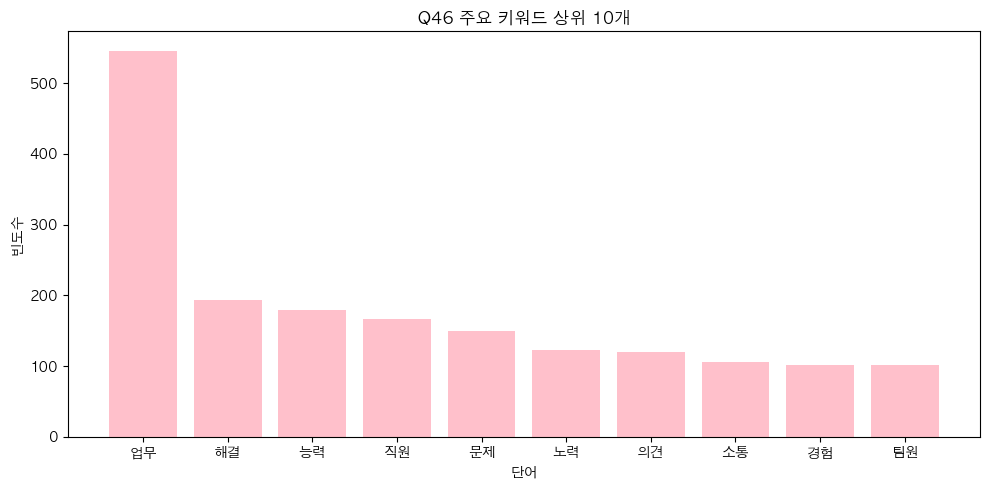

In [65]:
# 단어 빈도수 계산
word_freq = Counter(nouns)

# 상위 10개 추출
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

# 막대그래프 그리기
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color = 'pink')  # 색은 원하는 대로 조절
plt.title("Q46 주요 키워드 상위 10개", fontweight = 'bold')
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

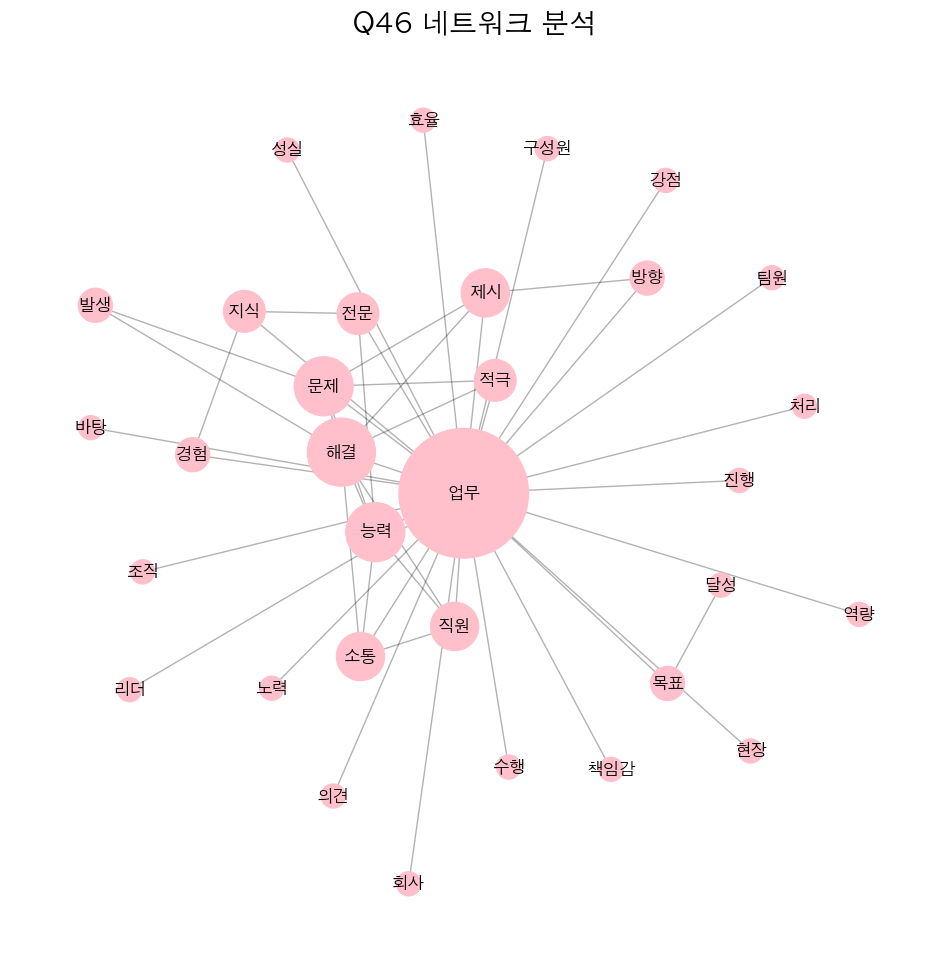

In [9]:
# 문장별 명사 만들기
doc_nouns = []

for sent in Q46:
    noun_list = [tok.form for tok in kiwi.tokenize(str(sent))
                 if tok.tag.startswith('N') and len(tok.form) >= 2]
    doc_nouns.append(list(set(noun_list)))


# 단어쌍 동시출현 카운트
co_occurrence = Counter()
for noun_list in doc_nouns:
    for w1, w2 in combinations(sorted(noun_list), 2):
        co_occurrence[(w1, w2)] += 1


# 3. DataFrame으로 변환
edges_df = pd.DataFrame([(w1, w2, freq) for (w1, w2), freq in co_occurrence.items()],
                        columns=['word1', 'word2', 'freq'])
edges_df = edges_df[edges_df['freq'] >= 30]  # 동시출현 3회 이상 필터링


# 4. 네트워크 생성
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['word1'], row['word2'], weight = row['freq'])

# 5. 중심성 계산 (연결 중심성 기준)
degree_dict = dict(nx.degree(G))


## 6. 시각화
plt.figure(figsize = (12, 12))
pos = nx.spring_layout(G, k = 3, seed = 42)

nx.draw_networkx_nodes(G, pos, node_size = [v * 300 for v in degree_dict.values()], node_color='pink')
nx.draw_networkx_edges(G, pos, alpha = 0.3)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size = 12)

plt.title("Q46 네트워크 분석", fontsize = 20, fontname = 'AppleGothic')
plt.axis('off')
plt.show()


In [10]:
### Q46_cluster_1

nouns = []
for sent in Q46_1:
    for tok in kiwi.tokenize(str(sent)):
        if tok.tag.startswith('N') and len(tok.form) >= 2:
            nouns.append(tok.form)

# 워드 클라우드
wc = WordCloud(font_path = "~/Desktop/text/Black_Han_Sans/BlackHanSans-Regular.ttf",
               width=800, 
               height=400, 
               background_color='white',
               color_func = red_gradient_color_func).generate(" ".join(nouns))
wc.to_image().show()

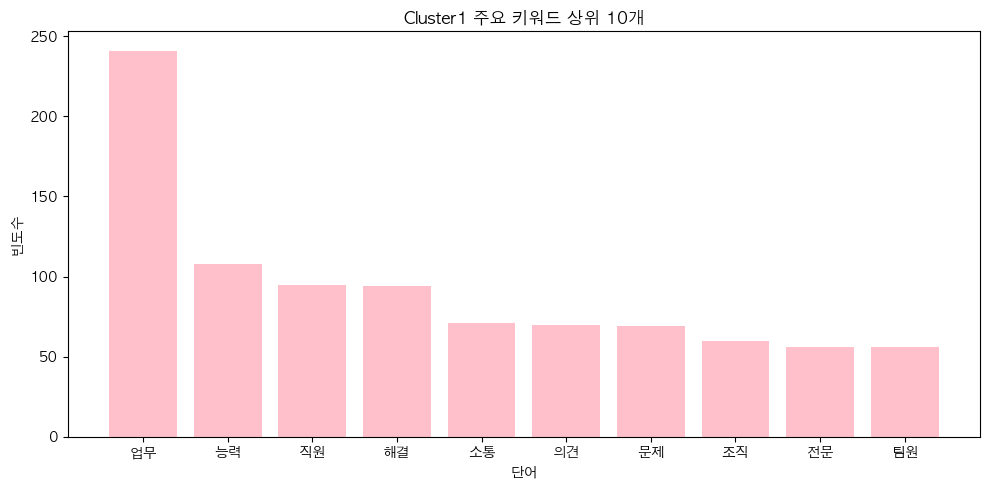

In [11]:
# 단어 빈도수 계산
word_freq = Counter(nouns)

# 상위 10개 추출
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

# 막대그래프 그리기
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color = 'pink')  # 색은 원하는 대로 조절
plt.title("Cluster1 주요 키워드 상위 10개", fontweight = 'bold')
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

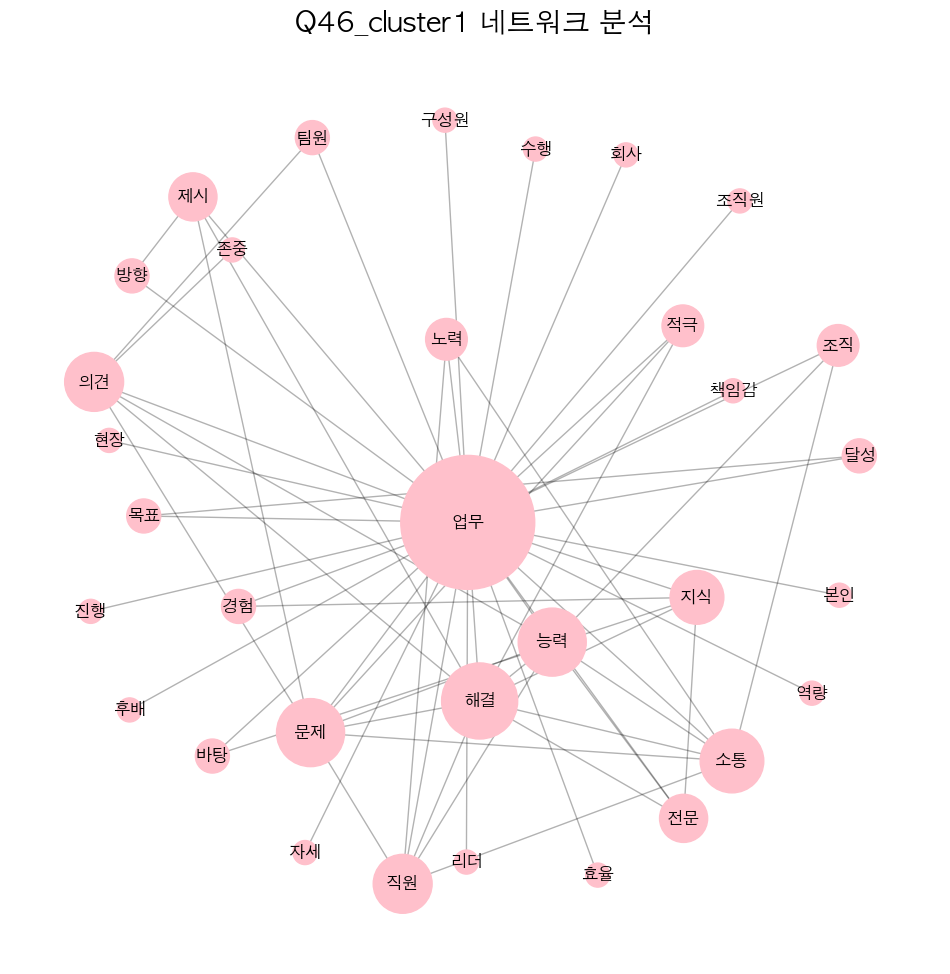

In [90]:
# 문장별 명사 만들기
doc_nouns = []

for sent in Q46_1:
    noun_list = [tok.form for tok in kiwi.tokenize(str(sent))
                 if tok.tag.startswith('N') and len(tok.form) >= 2]
    doc_nouns.append(list(set(noun_list)))


# 단어쌍 동시출현 카운트
co_occurrence = Counter()
for noun_list in doc_nouns:
    for w1, w2 in combinations(sorted(noun_list), 2):
        co_occurrence[(w1, w2)] += 1


# 3. DataFrame으로 변환
edges_df = pd.DataFrame([(w1, w2, freq) for (w1, w2), freq in co_occurrence.items()],
                        columns=['word1', 'word2', 'freq'])
edges_df = edges_df[edges_df['freq'] >= 15]  # 동시출현 3회 이상 필터링


# 4. 네트워크 생성
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['word1'], row['word2'], weight = row['freq'])

# 5. 중심성 계산 (연결 중심성 기준)
degree_dict = dict(nx.degree(G))


## 6. 시각화
plt.figure(figsize = (12, 12))
pos = nx.spring_layout(G, k = 5, seed = 42)

nx.draw_networkx_nodes(G, pos, node_size = [v * 300 for v in degree_dict.values()], node_color='pink')
nx.draw_networkx_edges(G, pos, alpha = 0.3)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size = 12)

plt.title("Q46_cluster1 네트워크 분석", fontsize = 20, fontname = 'AppleGothic')
plt.axis('off')
plt.show()

In [12]:
### Q46_cluster_2

nouns = []
for sent in Q46_2:
    for tok in kiwi.tokenize(str(sent)):
        if tok.tag.startswith('N') and len(tok.form) >= 2:
            nouns.append(tok.form)

# 워드 클라우드
wc = WordCloud(font_path = "~/Desktop/text/Black_Han_Sans/BlackHanSans-Regular.ttf",
               width=800, 
               height=400, 
               background_color='white',
               color_func = red_gradient_color_func).generate(" ".join(nouns))
wc.to_image().show()

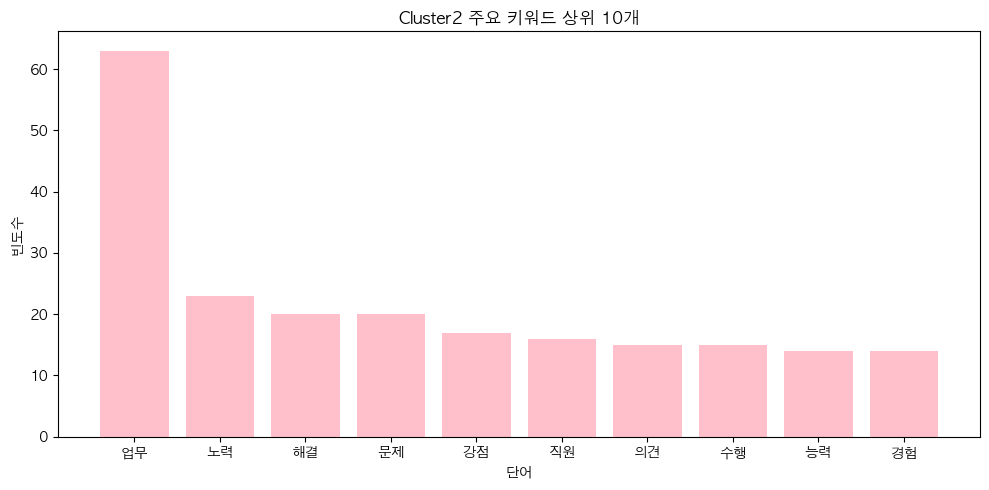

In [78]:
# 단어 빈도수 계산
word_freq = Counter(nouns)

# 상위 10개 추출
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

# 막대그래프 그리기
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color = 'pink')  # 색은 원하는 대로 조절
plt.title("Cluster2 주요 키워드 상위 10개", fontweight = 'bold')
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

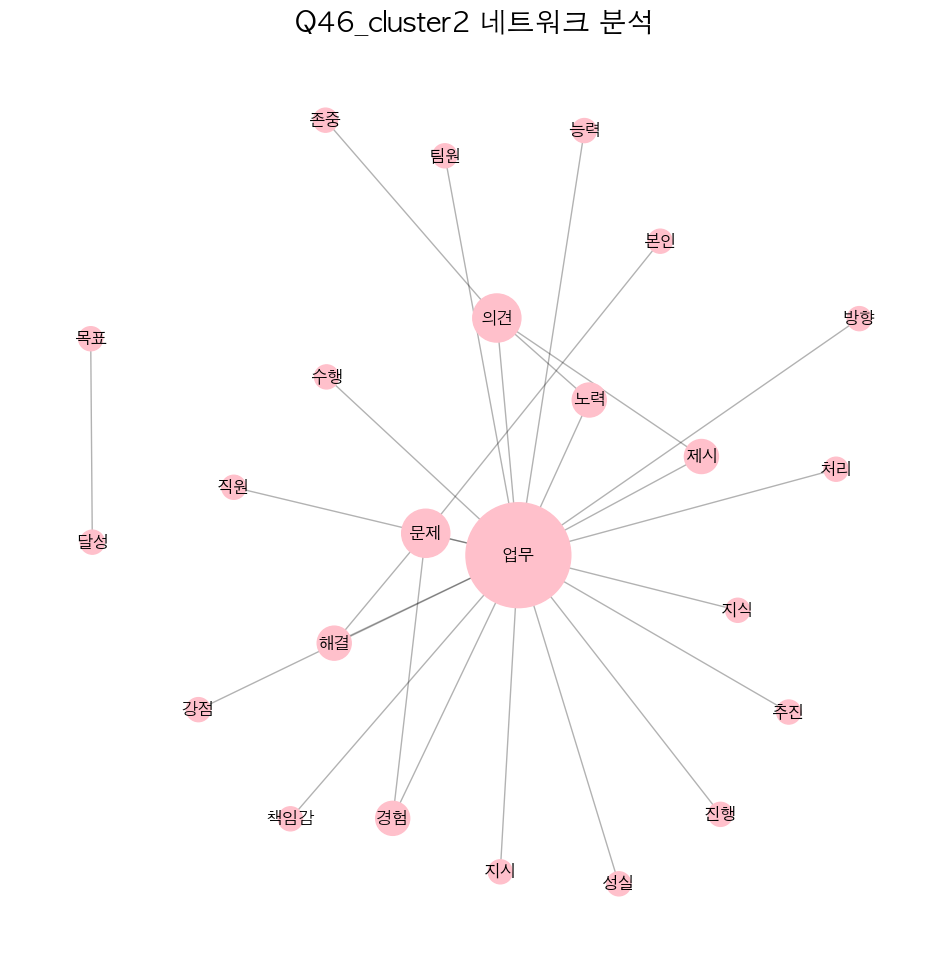

In [86]:
# 문장별 명사 만들기
doc_nouns = []

for sent in Q46_2:
    noun_list = [tok.form for tok in kiwi.tokenize(str(sent))
                 if tok.tag.startswith('N') and len(tok.form) >= 2]
    doc_nouns.append(list(set(noun_list)))


# 단어쌍 동시출현 카운트
co_occurrence = Counter()
for noun_list in doc_nouns:
    for w1, w2 in combinations(sorted(noun_list), 2):
        co_occurrence[(w1, w2)] += 1


# 3. DataFrame으로 변환
edges_df = pd.DataFrame([(w1, w2, freq) for (w1, w2), freq in co_occurrence.items()],
                        columns=['word1', 'word2', 'freq'])
edges_df = edges_df[edges_df['freq'] >= 5]  # 동시출현 3회 이상 필터링


# 4. 네트워크 생성
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['word1'], row['word2'], weight = row['freq'])

# 5. 중심성 계산 (연결 중심성 기준)
degree_dict = dict(nx.degree(G))


## 6. 시각화
plt.figure(figsize = (12, 12))
pos = nx.spring_layout(G, k = 2, seed = 42)

nx.draw_networkx_nodes(G, pos, node_size = [v * 300 for v in degree_dict.values()], node_color='pink')
nx.draw_networkx_edges(G, pos, alpha = 0.3)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size = 12)

plt.title("Q46_cluster2 네트워크 분석", fontsize = 20, fontname = 'AppleGothic')
plt.axis('off')
plt.show()

In [13]:
### Q46_cluster_3

nouns = []
for sent in Q46_3:
    for tok in kiwi.tokenize(str(sent)):
        if tok.tag.startswith('N') and len(tok.form) >= 2:
            nouns.append(tok.form)

# 워드 클라우드
wc = WordCloud(font_path = "~/Desktop/text/Black_Han_Sans/BlackHanSans-Regular.ttf",
               width=800, 
               height=400, 
               background_color='white',
               color_func = red_gradient_color_func).generate(" ".join(nouns))
wc.to_image().show()

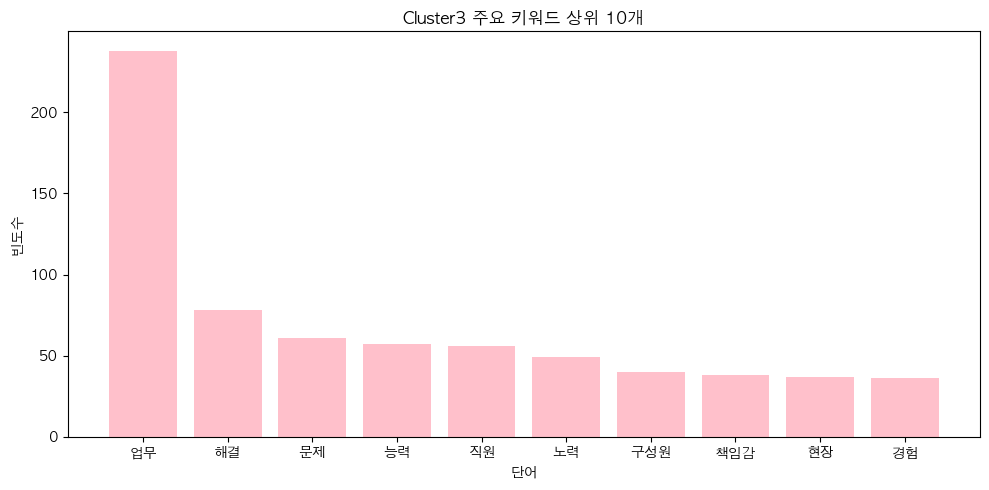

In [84]:
# 단어 빈도수 계산
word_freq = Counter(nouns)

# 상위 10개 추출
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

# 막대그래프 그리기
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color = 'pink')  # 색은 원하는 대로 조절
plt.title("Cluster3 주요 키워드 상위 10개", fontweight = 'bold')
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

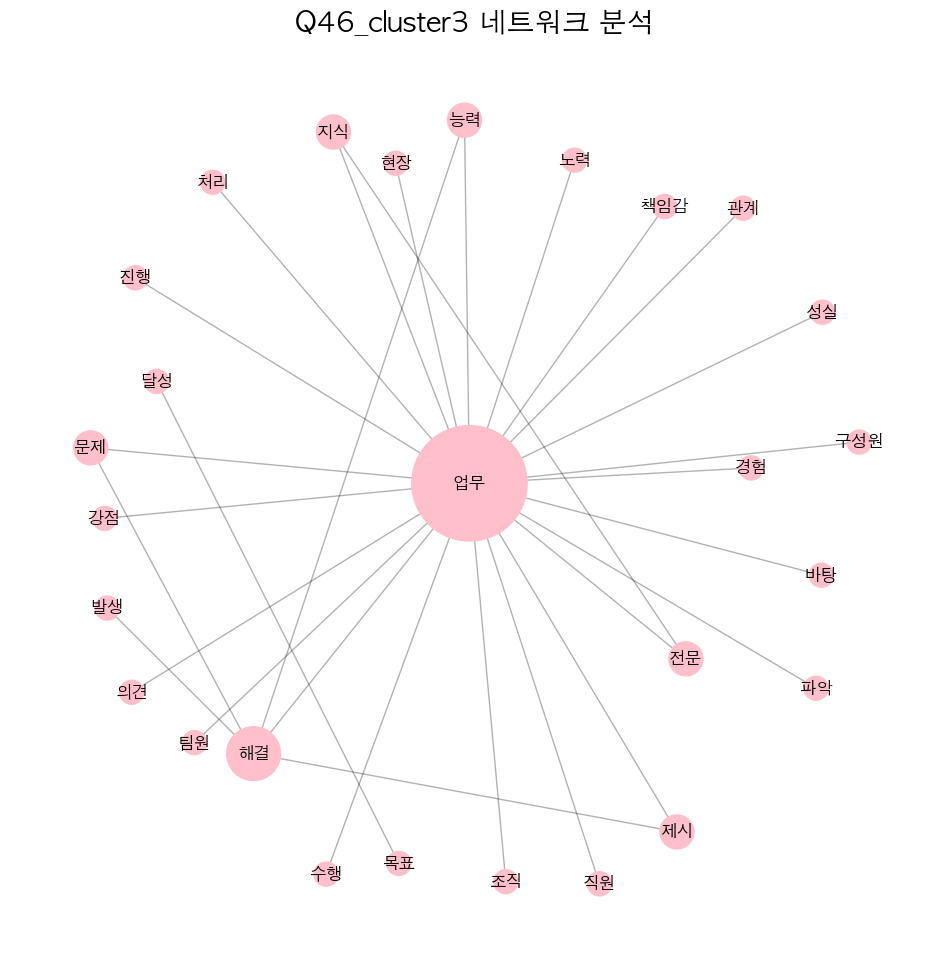

In [94]:
# 문장별 명사 만들기
doc_nouns = []

for sent in Q46_3:
    noun_list = [tok.form for tok in kiwi.tokenize(str(sent))
                 if tok.tag.startswith('N') and len(tok.form) >= 2]
    doc_nouns.append(list(set(noun_list)))


# 단어쌍 동시출현 카운트
co_occurrence = Counter()
for noun_list in doc_nouns:
    for w1, w2 in combinations(sorted(noun_list), 2):
        co_occurrence[(w1, w2)] += 1


# 3. DataFrame으로 변환
edges_df = pd.DataFrame([(w1, w2, freq) for (w1, w2), freq in co_occurrence.items()],
                        columns=['word1', 'word2', 'freq'])
edges_df = edges_df[edges_df['freq'] >= 15]  # 동시출현 3회 이상 필터링


# 4. 네트워크 생성
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['word1'], row['word2'], weight = row['freq'])

# 5. 중심성 계산 (연결 중심성 기준)
degree_dict = dict(nx.degree(G))


## 6. 시각화
plt.figure(figsize = (12, 12))
pos = nx.spring_layout(G, k = 5, seed = 42)

nx.draw_networkx_nodes(G, pos, node_size = [v * 300 for v in degree_dict.values()], node_color='pink')
nx.draw_networkx_edges(G, pos, alpha = 0.3)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size = 12)

plt.title("Q46_cluster3 네트워크 분석", fontsize = 20, fontname = 'AppleGothic')
plt.axis('off')
plt.show()

In [95]:
### Q47_total

nouns = []
for sent in Q47:
    for tok in kiwi.tokenize(str(sent)):
        if tok.tag.startswith('N') and len(tok.form) >= 2:
            nouns.append(tok.form)

# 워드 클라우드
wc = WordCloud(font_path = "~/Desktop/text/Black_Han_Sans/BlackHanSans-Regular.ttf",
               width=800, 
               height=400, 
               background_color='white',
               color_func = red_gradient_color_func).generate(" ".join(nouns))
wc.to_image().show()

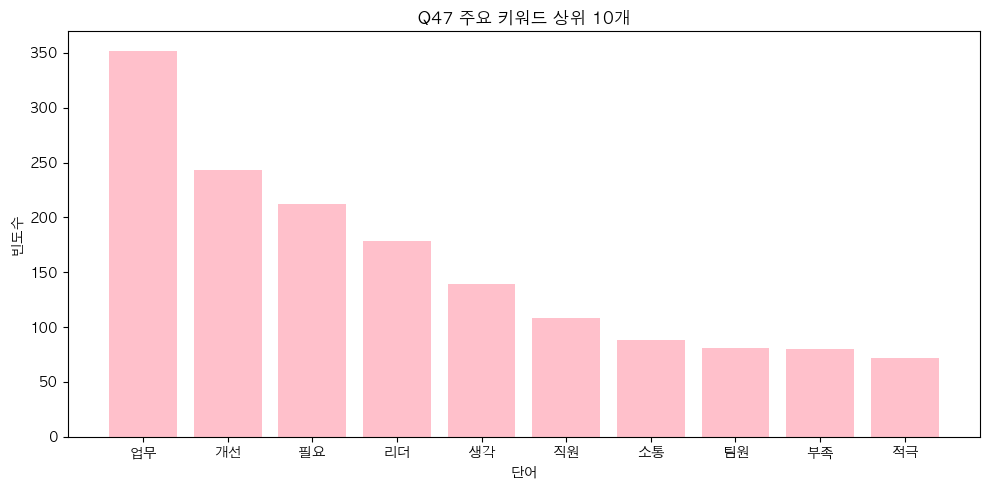

In [97]:
# 단어 빈도수 계산
word_freq = Counter(nouns)

# 상위 10개 추출
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

# 막대그래프 그리기
plt.figure(figsize = (10, 5))
plt.bar(words, counts, color = 'pink')  # 색은 원하는 대로 조절
plt.title("Q47 주요 키워드 상위 10개", fontweight = 'bold')
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

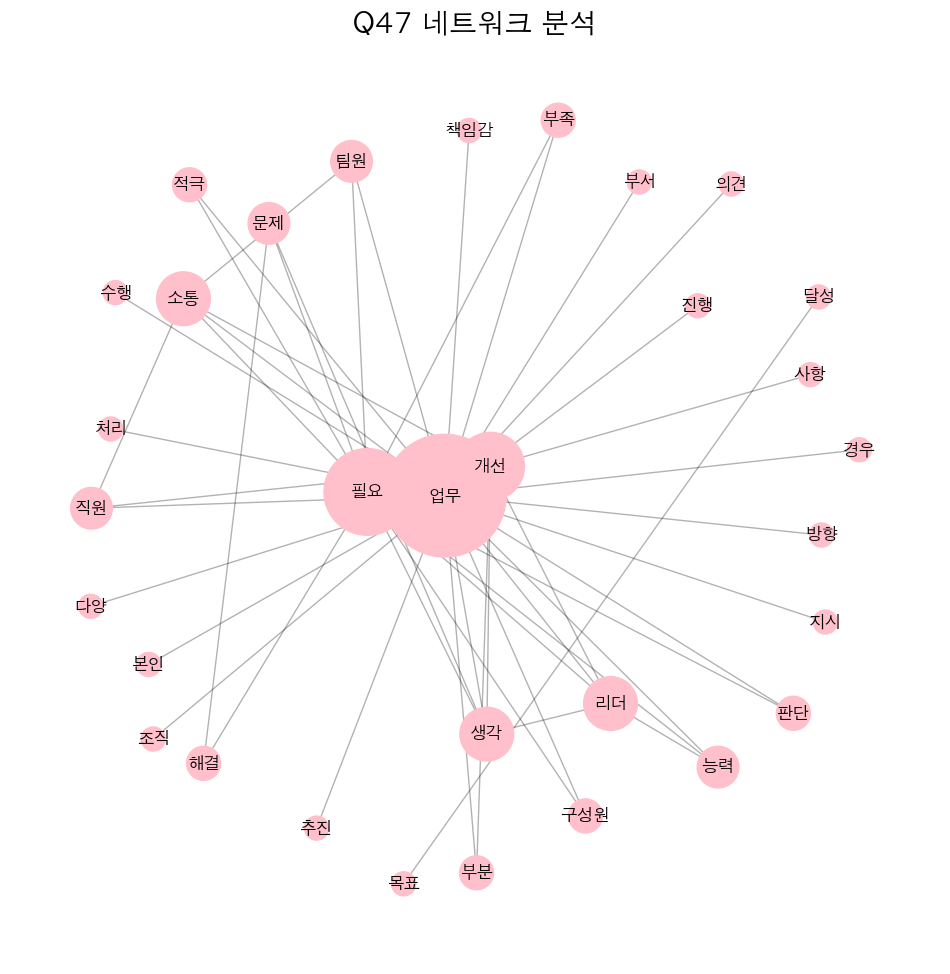

In [104]:
# 문장별 명사 만들기
doc_nouns = []

for sent in Q47:
    noun_list = [tok.form for tok in kiwi.tokenize(str(sent))
                 if tok.tag.startswith('N') and len(tok.form) >= 2]
    doc_nouns.append(list(set(noun_list)))


# 단어쌍 동시출현 카운트
co_occurrence = Counter()
for noun_list in doc_nouns:
    for w1, w2 in combinations(sorted(noun_list), 2):
        co_occurrence[(w1, w2)] += 1


# 3. DataFrame으로 변환
edges_df = pd.DataFrame([(w1, w2, freq) for (w1, w2), freq in co_occurrence.items()],
                        columns=['word1', 'word2', 'freq'])
edges_df = edges_df[edges_df['freq'] >= 17]  # 동시출현 3회 이상 필터링


# 4. 네트워크 생성
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['word1'], row['word2'], weight = row['freq'])

# 5. 중심성 계산 (연결 중심성 기준)
degree_dict = dict(nx.degree(G))


## 6. 시각화
plt.figure(figsize = (12, 12))
pos = nx.spring_layout(G, k = 5, seed = 42)

nx.draw_networkx_nodes(G, pos, node_size = [v * 300 for v in degree_dict.values()], node_color='pink')
nx.draw_networkx_edges(G, pos, alpha = 0.3)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size = 12)

plt.title("Q47 네트워크 분석", fontsize = 20, fontname = 'AppleGothic')
plt.axis('off')
plt.show()

In [105]:
### Q47_1

kiwi = Kiwi()
nouns = []

for sent in Q47_1:
    for tok in kiwi.tokenize(str(sent)):
        if tok.tag.startswith('N') and len(tok.form) >= 2:
            nouns.append(tok.form)

# 워드 클라우드
wc = WordCloud(font_path = "~/Desktop/text/Black_Han_Sans/BlackHanSans-Regular.ttf",
               width=800, 
               height=400, 
               background_color='white',
               color_func = red_gradient_color_func).generate(" ".join(nouns))
wc.to_image().show()

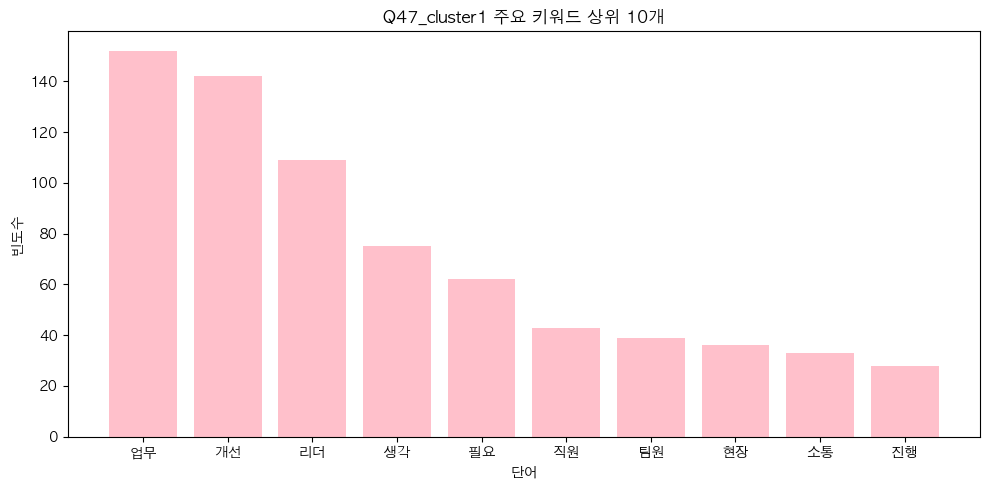

In [107]:
# 단어 빈도수 계산
word_freq = Counter(nouns)

# 상위 10개 추출
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

# 막대그래프 그리기
plt.figure(figsize = (10, 5))
plt.bar(words, counts, color = 'pink')  # 색은 원하는 대로 조절
plt.title("Q47_cluster1 주요 키워드 상위 10개", fontweight = 'bold')
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

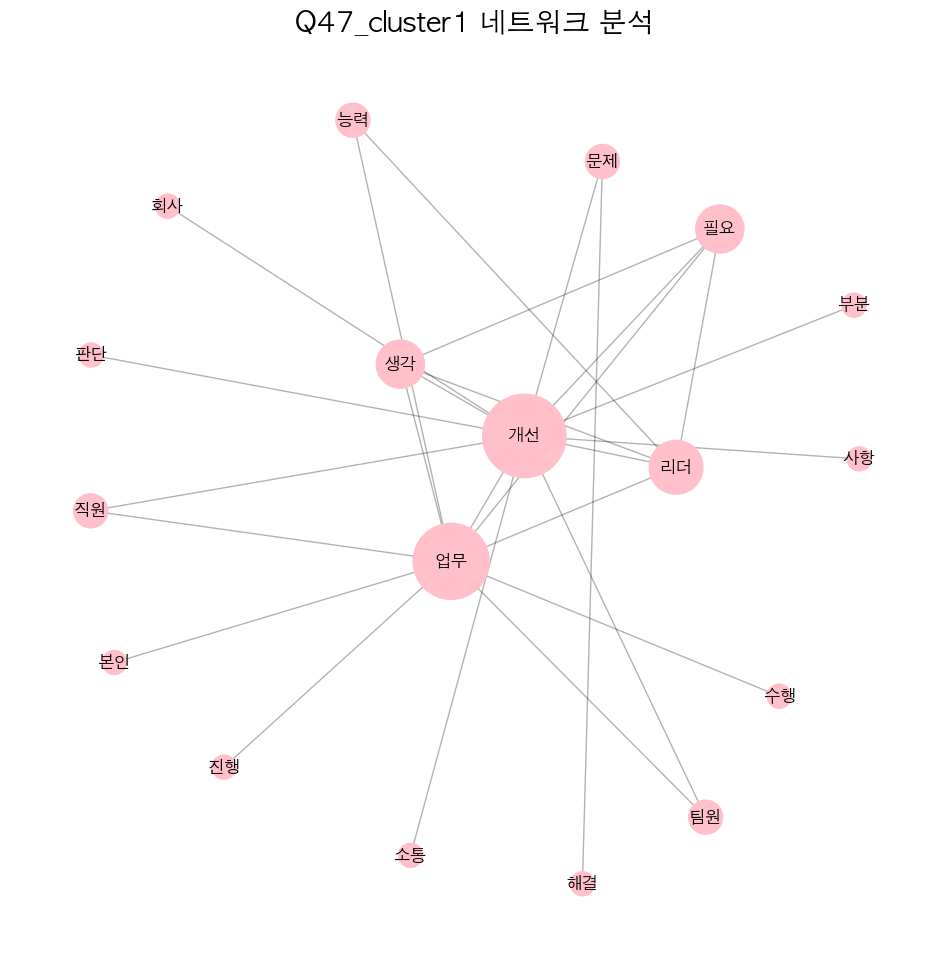

In [109]:
# 문장별 명사 만들기
doc_nouns = []

for sent in Q47_1:
    noun_list = [tok.form for tok in kiwi.tokenize(str(sent))
                 if tok.tag.startswith('N') and len(tok.form) >= 2]
    doc_nouns.append(list(set(noun_list)))


# 단어쌍 동시출현 카운트
co_occurrence = Counter()
for noun_list in doc_nouns:
    for w1, w2 in combinations(sorted(noun_list), 2):
        co_occurrence[(w1, w2)] += 1


# 3. DataFrame으로 변환
edges_df = pd.DataFrame([(w1, w2, freq) for (w1, w2), freq in co_occurrence.items()],
                        columns=['word1', 'word2', 'freq'])
edges_df = edges_df[edges_df['freq'] >= 10]  # 동시출현 3회 이상 필터링


# 4. 네트워크 생성
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['word1'], row['word2'], weight = row['freq'])

# 5. 중심성 계산 (연결 중심성 기준)
degree_dict = dict(nx.degree(G))


## 6. 시각화
plt.figure(figsize = (12, 12))
pos = nx.spring_layout(G, k = 5, seed = 42)

nx.draw_networkx_nodes(G, pos, node_size = [v * 300 for v in degree_dict.values()], node_color='pink')
nx.draw_networkx_edges(G, pos, alpha = 0.3)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size = 12)

plt.title("Q47_cluster1 네트워크 분석", fontsize = 20, fontname = 'AppleGothic')
plt.axis('off')
plt.show()

In [110]:
### Q47_2

kiwi = Kiwi()
nouns = []
for sent in Q47_2:
    for tok in kiwi.tokenize(str(sent)):
        if tok.tag.startswith('N') and len(tok.form) >= 2:
            nouns.append(tok.form)

# 워드 클라우드
wc = WordCloud(font_path = "~/Desktop/text/Black_Han_Sans/BlackHanSans-Regular.ttf",
               width=800, 
               height=400, 
               background_color='white',
               color_func = red_gradient_color_func).generate(" ".join(nouns))
wc.to_image().show()

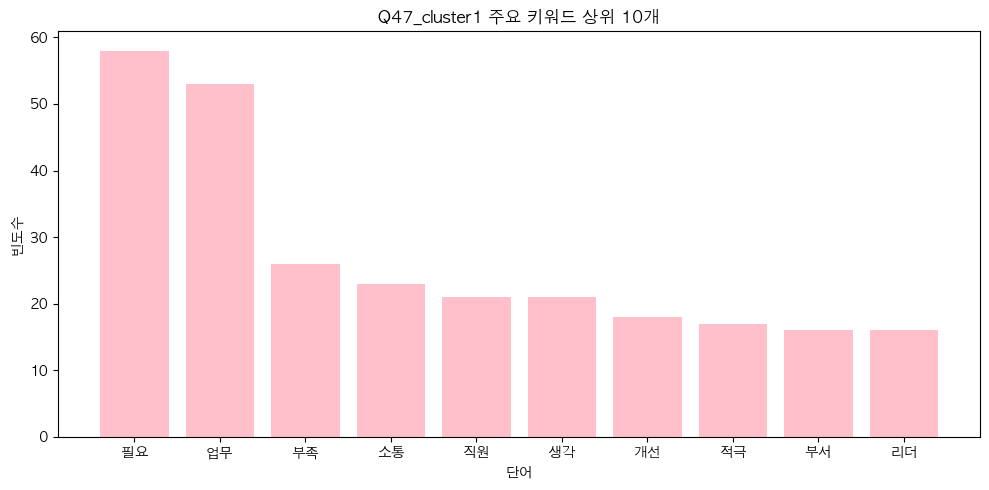

In [ ]:
# 단어 빈도수 계산
word_freq = Counter(nouns)

# 상위 10개 추출
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

# 막대그래프 그리기
plt.figure(figsize = (10, 5))
plt.bar(words, counts, color = 'pink')  # 색은 원하는 대로 조절
plt.title("Q47_cluster2 주요 키워드 상위 10개", fontweight = 'bold')
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

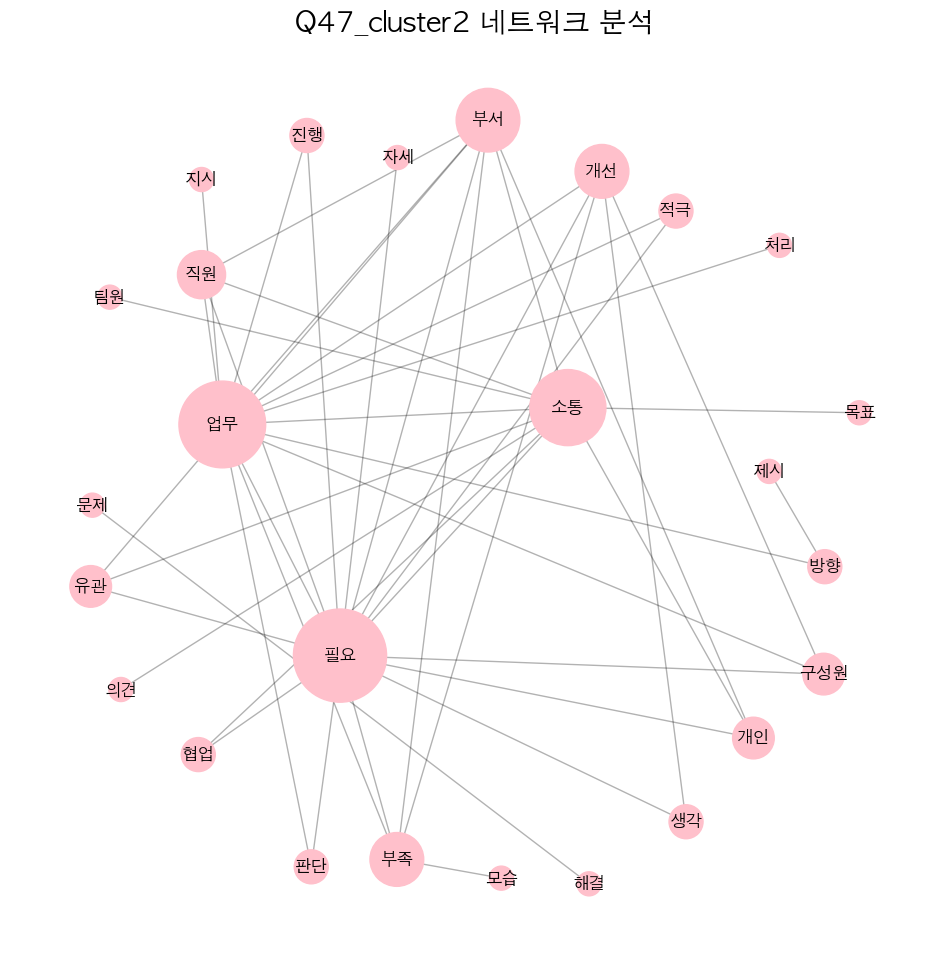

In [113]:
# 문장별 명사 만들기
doc_nouns = []

for sent in Q47_2:
    noun_list = [tok.form for tok in kiwi.tokenize(str(sent))
                 if tok.tag.startswith('N') and len(tok.form) >= 2]
    doc_nouns.append(list(set(noun_list)))


# 단어쌍 동시출현 카운트
co_occurrence = Counter()
for noun_list in doc_nouns:
    for w1, w2 in combinations(sorted(noun_list), 2):
        co_occurrence[(w1, w2)] += 1


# 3. DataFrame으로 변환
edges_df = pd.DataFrame([(w1, w2, freq) for (w1, w2), freq in co_occurrence.items()],
                        columns=['word1', 'word2', 'freq'])
edges_df = edges_df[edges_df['freq'] >= 5]  # 동시출현 3회 이상 필터링


# 4. 네트워크 생성
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['word1'], row['word2'], weight = row['freq'])

# 5. 중심성 계산 (연결 중심성 기준)
degree_dict = dict(nx.degree(G))


## 6. 시각화
plt.figure(figsize = (12, 12))
pos = nx.spring_layout(G, k = 5, seed = 42)

nx.draw_networkx_nodes(G, pos, node_size = [v * 300 for v in degree_dict.values()], node_color='pink')
nx.draw_networkx_edges(G, pos, alpha = 0.3)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size = 12)

plt.title("Q47_cluster2 네트워크 분석", fontsize = 20, fontname = 'AppleGothic')
plt.axis('off')
plt.show()

In [114]:
### Q47_3

kiwi = Kiwi()
nouns = []
for sent in Q47_3:
    for tok in kiwi.tokenize(str(sent)):
        if tok.tag.startswith('N') and len(tok.form) >= 2:
            nouns.append(tok.form)

# 워드 클라우드
wc = WordCloud(font_path = "~/Desktop/text/Black_Han_Sans/BlackHanSans-Regular.ttf",
               width=800, 
               height=400, 
               background_color='white',
               color_func = red_gradient_color_func).generate(" ".join(nouns))
wc.to_image().show()

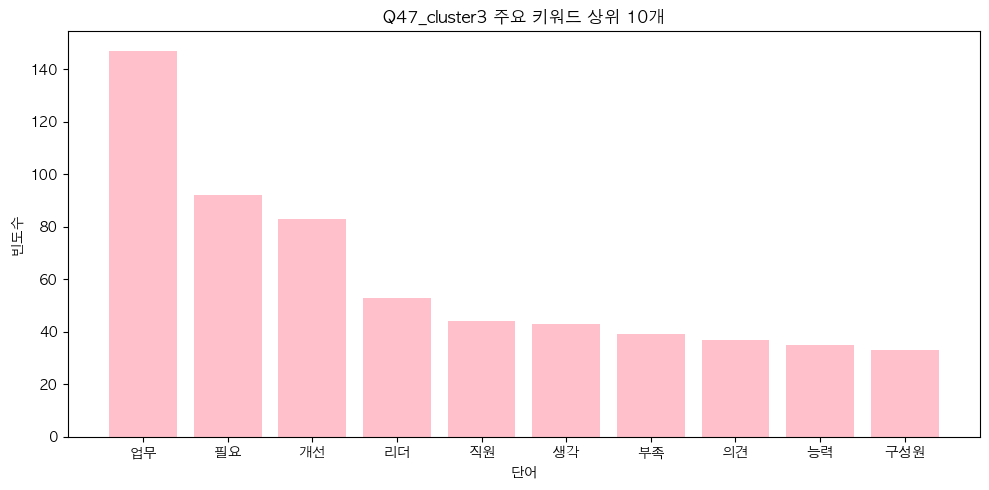

In [115]:
# 단어 빈도수 계산
word_freq = Counter(nouns)

# 상위 10개 추출
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

# 막대그래프 그리기
plt.figure(figsize = (10, 5))
plt.bar(words, counts, color = 'pink')  # 색은 원하는 대로 조절
plt.title("Q47_cluster3 주요 키워드 상위 10개", fontweight = 'bold')
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

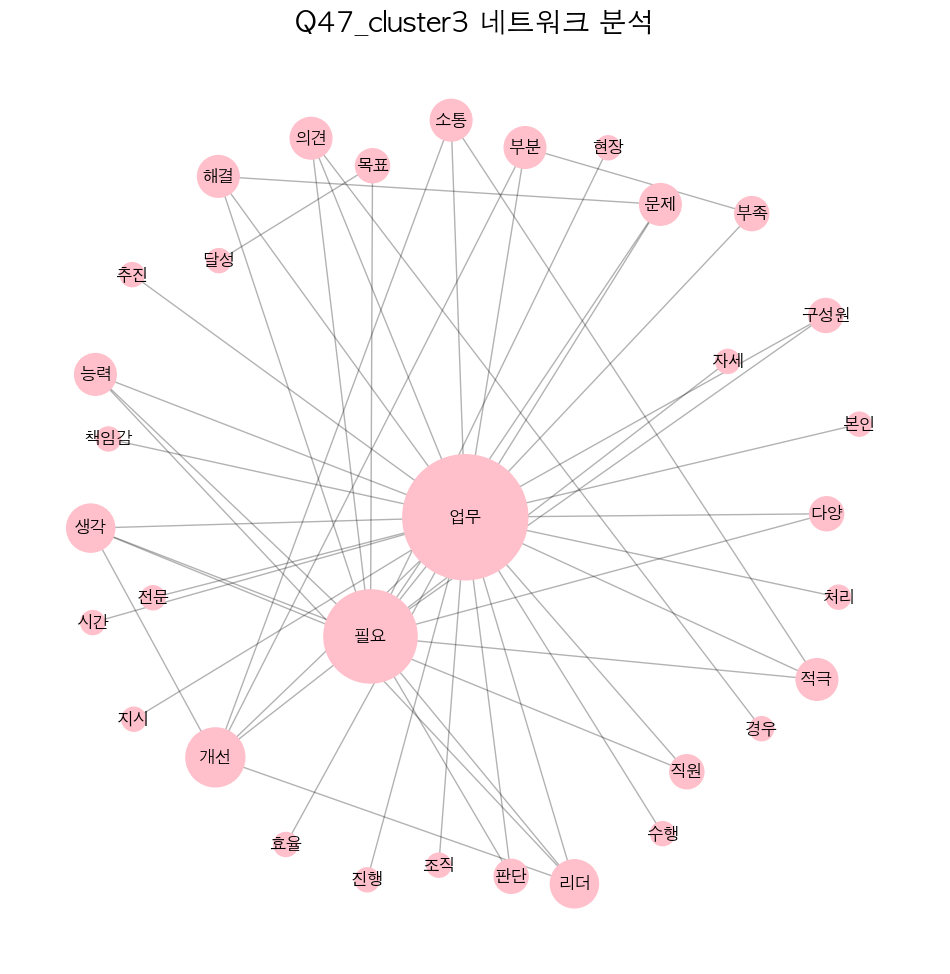

In [120]:
# 문장별 명사 만들기
doc_nouns = []

for sent in Q47_3:
    noun_list = [tok.form for tok in kiwi.tokenize(str(sent))
                 if tok.tag.startswith('N') and len(tok.form) >= 2]
    doc_nouns.append(list(set(noun_list)))


# 단어쌍 동시출현 카운트
co_occurrence = Counter()
for noun_list in doc_nouns:
    for w1, w2 in combinations(sorted(noun_list), 2):
        co_occurrence[(w1, w2)] += 1


# 3. DataFrame으로 변환
edges_df = pd.DataFrame([(w1, w2, freq) for (w1, w2), freq in co_occurrence.items()],
                        columns=['word1', 'word2', 'freq'])
edges_df = edges_df[edges_df['freq'] >= 8]  # 동시출현 3회 이상 필터링


# 4. 네트워크 생성
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['word1'], row['word2'], weight = row['freq'])

# 5. 중심성 계산 (연결 중심성 기준)
degree_dict = dict(nx.degree(G))


## 6. 시각화
plt.figure(figsize = (12, 12))
pos = nx.spring_layout(G, k = 5, seed = 42)

nx.draw_networkx_nodes(G, pos, node_size = [v * 300 for v in degree_dict.values()], node_color='pink')
nx.draw_networkx_edges(G, pos, alpha = 0.3)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size = 12)

plt.title("Q47_cluster3 네트워크 분석", fontsize = 20, fontname = 'AppleGothic')
plt.axis('off')
plt.show()